In [18]:
import csv

import numpy as np
import tensorflow as tf
from sklearn import model_selection
import os

In [19]:
RANDOM_SEED = 42
NUM_CLASSES = 25
dataset = 'keypoint_classifier/keypoint_key_letters_right_11.csv'
model_save_path = 'keypoint_classifier/GRU_model_right_11.hdf5'

In [20]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [21]:

X_train = X_train[:, None, :]
print(X_train.shape)

(218, 1, 42)


In [22]:
X_test = X_test[:, None, :]
print(X_test.shape)

(73, 1, 42)


In [23]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from keras.layers import GRU
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(1,42)))
model.add(Dropout(0.2))
model.add(GRU(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(NUM_CLASSES, activation = "softmax"))

In [24]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

# model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# callback for early abort
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

 # model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 1, 50)             14100     
                                                                 
 dropout_4 (Dropout)         (None, 1, 50)             0         
                                                                 
 gru_5 (GRU)                 (None, 100)               45600     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
Total params: 62,225
Trainable params: 62,225
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(
    X_train,
    y_train,
    epochs=500,
    batch_size=128,
    validation_split=0.2,
    callbacks=[cp_callback, es_callback]
)

Epoch 1/500
1/2 [==============>...............] - ETA: 2s - loss: 3.2287 - accuracy: 0.0312
Epoch 1: saving model to keypoint_classifier\GRU_model_right_11.hdf5
2/2 [==============================] - 3s 557ms/step - loss: 3.2242 - accuracy: 0.0287 - val_loss: 3.2114 - val_accuracy: 0.0909
Epoch 2/500
1/2 [==============>...............] - ETA: 0s - loss: 3.2118 - accuracy: 0.0078
Epoch 2: saving model to keypoint_classifier\GRU_model_right_11.hdf5
2/2 [==============================] - 0s 47ms/step - loss: 3.2132 - accuracy: 0.0172 - val_loss: 3.2063 - val_accuracy: 0.0909
Epoch 3/500
1/2 [==============>...............] - ETA: 0s - loss: 3.2042 - accuracy: 0.0781
Epoch 3: saving model to keypoint_classifier\GRU_model_right_11.hdf5
2/2 [==============================] - 0s 53ms/step - loss: 3.2047 - accuracy: 0.0747 - val_loss: 3.2022 - val_accuracy: 0.0909
Epoch 4/500
1/2 [==============>...............] - ETA: 0s - loss: 3.1906 - accuracy: 0.0859
Epoch 4: saving model to keypoint_cl

3/3 [==============================] - 0s 2ms/step


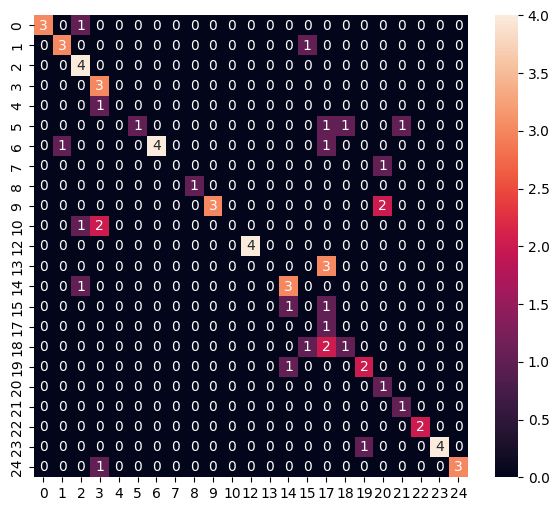

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.75      0.75      0.75         4
           2       0.57      1.00      0.73         4
           3       0.43      1.00      0.60         3
           4       0.00      0.00      0.00         1
           5       1.00      0.25      0.40         4
           6       1.00      0.67      0.80         6
           7       0.00      0.00      0.00         3
           8       1.00      1.00      1.00         1
           9       1.00      0.50      0.67         6
          10       0.00      0.00      0.00         3
          12       1.00      1.00      1.00         4
          13       0.00      0.00      0.00         3
          14       0.60      0.75      0.67         4
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         0
          17       0.11      1.00      0.20         1
     

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

In [26]:
# callback needs to be done better, but still accuracy 86%
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [27]:
from sklearn import metrics
flat = y_test.flatten()
flat2 = y_pred.flatten()

# indexes are classifiers
classification = metrics.classification_report(flat, flat2,digits=3)
print(classification)

              precision    recall  f1-score   support

           0      1.000     0.750     0.857         4
           1      0.750     0.750     0.750         4
           2      0.571     1.000     0.727         4
           3      0.429     1.000     0.600         3
           4      0.000     0.000     0.000         1
           5      1.000     0.250     0.400         4
           6      1.000     0.667     0.800         6
           7      0.000     0.000     0.000         3
           8      1.000     1.000     1.000         1
           9      1.000     0.500     0.667         6
          10      0.000     0.000     0.000         3
          12      1.000     1.000     1.000         4
          13      0.000     0.000     0.000         3
          14      0.600     0.750     0.667         4
          15      0.000     0.000     0.000         2
          16      0.000     0.000     0.000         0
          17      0.111     1.000     0.200         1
          18      0.500    

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

Text(0.5, 1.0, 'Loss')

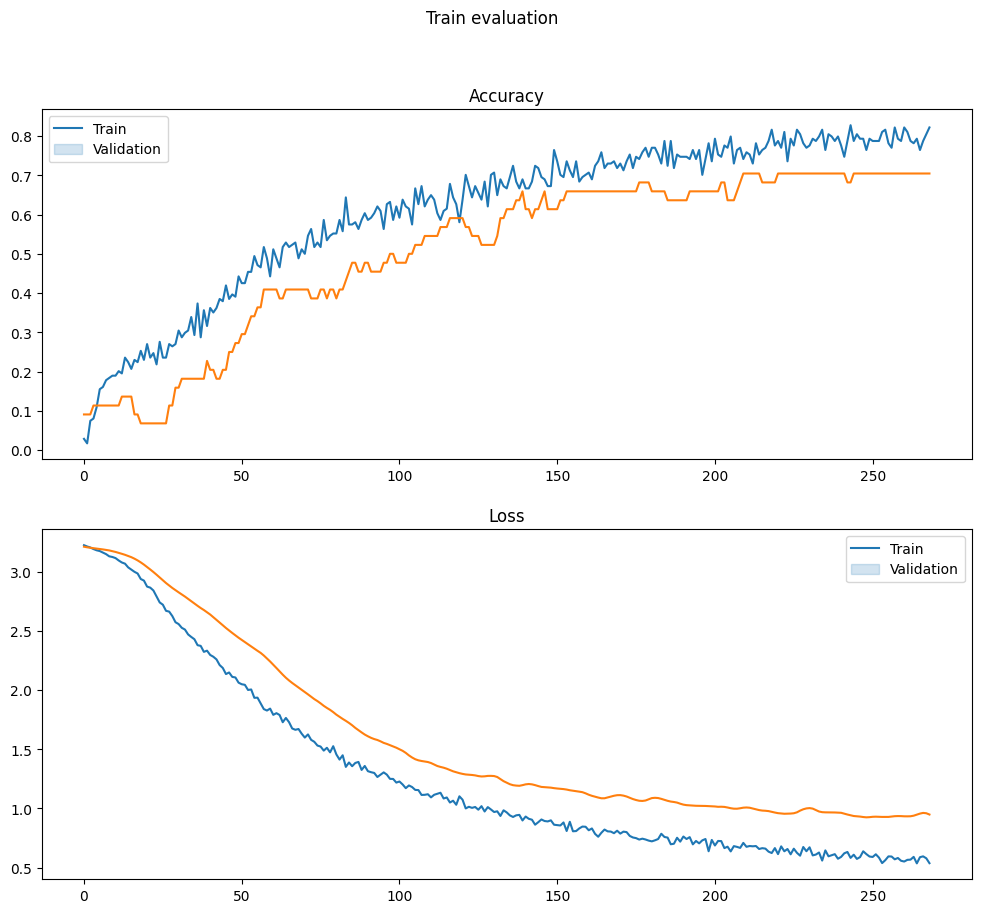

In [28]:
fig, ax=plt.subplots(2,1,figsize=(12,10))
fig.suptitle('Train evaluation')
# xlabel("X axis label")
# ylabel("Y axis label")

sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['accuracy'])
sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['val_accuracy'])

ax[0].legend(['Train','Validation'])
ax[0].set_title('Accuracy')

sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['loss'])
sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['val_loss'])

ax[1].legend(['Train','Validation'])
ax[1].set_title('Loss')
# creating charts and plotting them

In [29]:
model_save_path = 'keypoint_classifier/LSTM_model_right_11.hdf5'
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1,2*21)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(NUM_CLASSES, activation = "softmax"))

In [30]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

# model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# callback for early abort
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

 # model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             18600     
                                                                 
 dropout_6 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               60400     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 25)                2525      
                                                                 
Total params: 81,525
Trainable params: 81,525
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = model.fit(
    X_train,
    y_train,
    epochs=500,
    batch_size=128,
    validation_split=0.2,
    callbacks=[cp_callback, es_callback]
)

Epoch 1/500
1/2 [==============>...............] - ETA: 1s - loss: 3.2185 - accuracy: 0.0391
Epoch 1: saving model to keypoint_classifier\LSTM_model_right_11.hdf5
2/2 [==============================] - 2s 494ms/step - loss: 3.2184 - accuracy: 0.0402 - val_loss: 3.2174 - val_accuracy: 0.0682
Epoch 2/500
1/2 [==============>...............] - ETA: 0s - loss: 3.2161 - accuracy: 0.0312
Epoch 2: saving model to keypoint_classifier\LSTM_model_right_11.hdf5
2/2 [==============================] - 0s 41ms/step - loss: 3.2151 - accuracy: 0.0575 - val_loss: 3.2172 - val_accuracy: 0.0682
Epoch 3/500
1/2 [==============>...............] - ETA: 0s - loss: 3.2124 - accuracy: 0.0859
Epoch 3: saving model to keypoint_classifier\LSTM_model_right_11.hdf5
2/2 [==============================] - 0s 43ms/step - loss: 3.2111 - accuracy: 0.1034 - val_loss: 3.2169 - val_accuracy: 0.0000e+00
Epoch 4/500
1/2 [==============>...............] - ETA: 0s - loss: 3.2096 - accuracy: 0.1094
Epoch 4: saving model to keyp

3/3 [==============================] - 0s 2ms/step


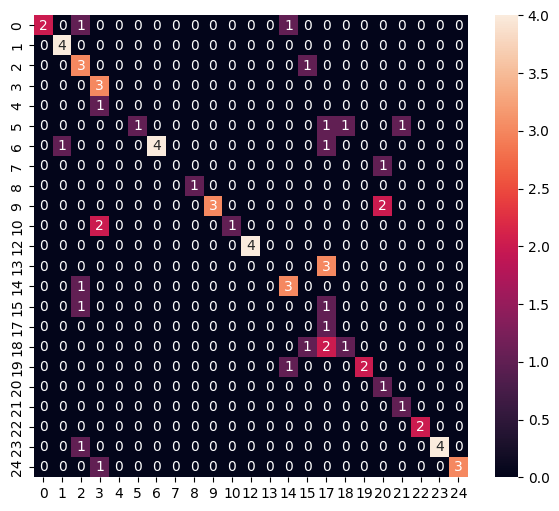

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.80      1.00      0.89         4
           2       0.43      0.75      0.55         4
           3       0.43      1.00      0.60         3
           4       0.00      0.00      0.00         1
           5       1.00      0.25      0.40         4
           6       1.00      0.67      0.80         6
           7       0.00      0.00      0.00         3
           8       1.00      1.00      1.00         1
           9       1.00      0.50      0.67         6
          10       1.00      0.33      0.50         3
          12       1.00      1.00      1.00         4
          13       0.00      0.00      0.00         3
          14       0.60      0.75      0.67         4
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         0
          17       0.11      1.00      0.20         1
     

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

In [32]:
# callback needs to be done better, but still accuracy 86%
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [33]:
from sklearn import metrics
flat = y_test.flatten()
flat2 = y_pred.flatten()

# indexes are classifiers
classification = metrics.classification_report(flat, flat2,digits=3)
print(classification)

              precision    recall  f1-score   support

           0      1.000     0.500     0.667         4
           1      0.800     1.000     0.889         4
           2      0.429     0.750     0.545         4
           3      0.429     1.000     0.600         3
           4      0.000     0.000     0.000         1
           5      1.000     0.250     0.400         4
           6      1.000     0.667     0.800         6
           7      0.000     0.000     0.000         3
           8      1.000     1.000     1.000         1
           9      1.000     0.500     0.667         6
          10      1.000     0.333     0.500         3
          12      1.000     1.000     1.000         4
          13      0.000     0.000     0.000         3
          14      0.600     0.750     0.667         4
          15      0.000     0.000     0.000         2
          16      0.000     0.000     0.000         0
          17      0.111     1.000     0.200         1
          18      0.500    

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

Text(0.5, 1.0, 'Loss')

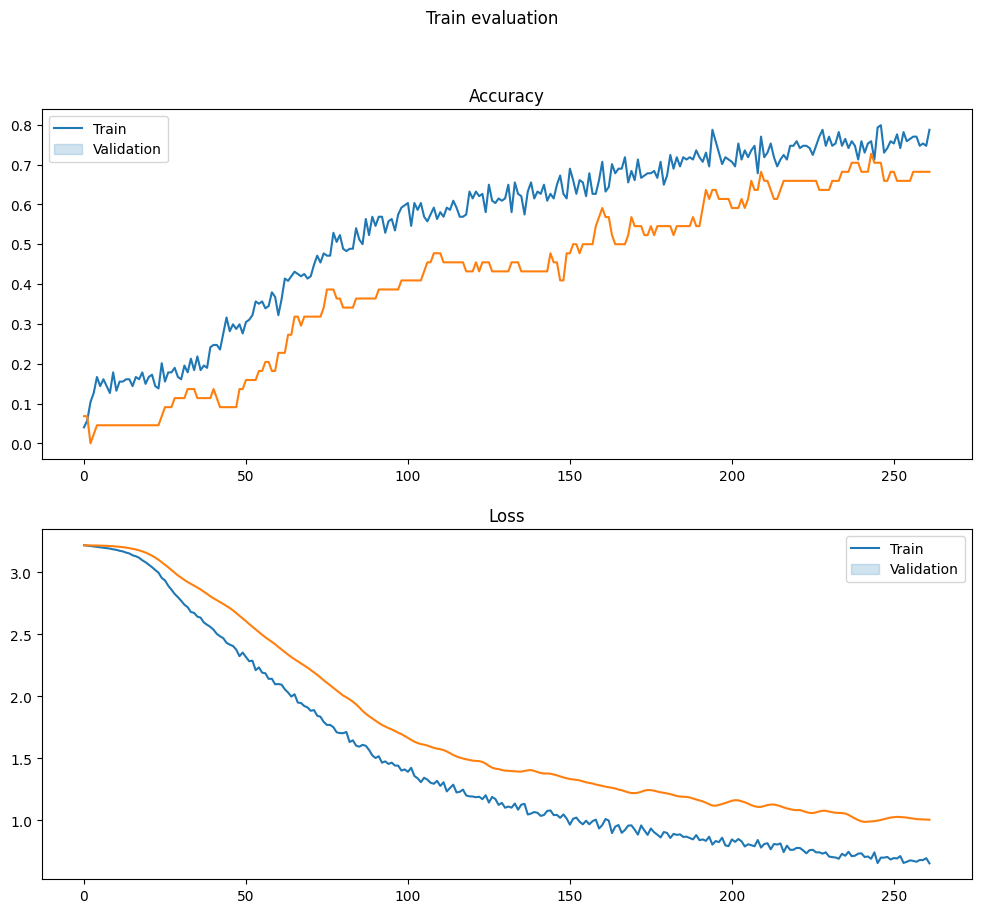

In [34]:
fig, ax=plt.subplots(2,1,figsize=(12,10))
fig.suptitle('Train evaluation')
# xlabel("X axis label")
# ylabel("Y axis label")

sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['accuracy'])
sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['val_accuracy'])

ax[0].legend(['Train','Validation'])
ax[0].set_title('Accuracy')

sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['loss'])
sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['val_loss'])

ax[1].legend(['Train','Validation'])
ax[1].set_title('Loss')
# creating charts and plotting them

In [35]:
model_save_path = 'keypoint_classifier/SimpleRNN_model_right_11.hdf5'
from keras.layers import SimpleRNN
model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(1,2*21)))
model.add(Dropout(0.2))
model.add(SimpleRNN(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(NUM_CLASSES, activation = "softmax"))

In [36]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

# model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# callback for early abort
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

 # model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 50)             4650      
                                                                 
 dropout_8 (Dropout)         (None, 1, 50)             0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 100)               15100     
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 25)                2525      
                                                                 
Total params: 22,275
Trainable params: 22,275
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(
    X_train,
    y_train,
    epochs=500,
    batch_size=128,
    validation_split=0.2,
    callbacks=[cp_callback, es_callback]
)

Epoch 1/500
1/2 [==============>...............] - ETA: 1s - loss: 3.3798 - accuracy: 0.0156
Epoch 1: saving model to keypoint_classifier\SimpleRNN_model_right_11.hdf5
2/2 [==============================] - 1s 220ms/step - loss: 3.3463 - accuracy: 0.0230 - val_loss: 3.2891 - val_accuracy: 0.0000e+00
Epoch 2/500
1/2 [==============>...............] - ETA: 0s - loss: 3.2429 - accuracy: 0.0391
Epoch 2: saving model to keypoint_classifier\SimpleRNN_model_right_11.hdf5
2/2 [==============================] - 0s 38ms/step - loss: 3.2259 - accuracy: 0.0345 - val_loss: 3.2471 - val_accuracy: 0.0455
Epoch 3/500
1/2 [==============>...............] - ETA: 0s - loss: 3.1665 - accuracy: 0.0859
Epoch 3: saving model to keypoint_classifier\SimpleRNN_model_right_11.hdf5
2/2 [==============================] - 0s 40ms/step - loss: 3.1679 - accuracy: 0.0747 - val_loss: 3.2075 - val_accuracy: 0.0227
Epoch 4/500
1/2 [==============>...............] - ETA: 0s - loss: 3.1403 - accuracy: 0.1094
Epoch 4: savin

3/3 [==============================] - 0s 2ms/step


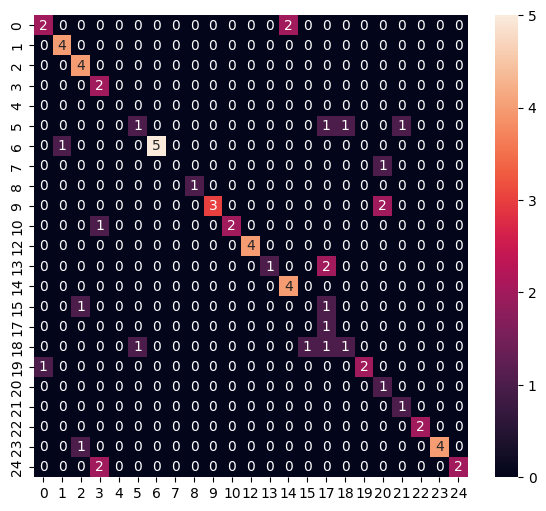

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.80      1.00      0.89         4
           2       0.67      1.00      0.80         4
           3       0.40      0.67      0.50         3
           4       0.00      0.00      0.00         1
           5       0.50      0.25      0.33         4
           6       1.00      0.83      0.91         6
           7       0.00      0.00      0.00         3
           8       1.00      1.00      1.00         1
           9       1.00      0.50      0.67         6
          10       1.00      0.67      0.80         3
          12       1.00      1.00      1.00         4
          13       1.00      0.33      0.50         3
          14       0.67      1.00      0.80         4
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         0
          17       0.17      1.00      0.29         1
     

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [39]:
from sklearn import metrics
flat = y_test.flatten()
flat2 = y_pred.flatten()

# indexes are classifiers
classification = metrics.classification_report(flat, flat2,digits=3)
print(classification)

              precision    recall  f1-score   support

           0      0.667     0.500     0.571         4
           1      0.800     1.000     0.889         4
           2      0.667     1.000     0.800         4
           3      0.400     0.667     0.500         3
           4      0.000     0.000     0.000         1
           5      0.500     0.250     0.333         4
           6      1.000     0.833     0.909         6
           7      0.000     0.000     0.000         3
           8      1.000     1.000     1.000         1
           9      1.000     0.500     0.667         6
          10      1.000     0.667     0.800         3
          12      1.000     1.000     1.000         4
          13      1.000     0.333     0.500         3
          14      0.667     1.000     0.800         4
          15      0.000     0.000     0.000         2
          16      0.000     0.000     0.000         0
          17      0.167     1.000     0.286         1
          18      0.500    

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

Text(0.5, 1.0, 'Loss')

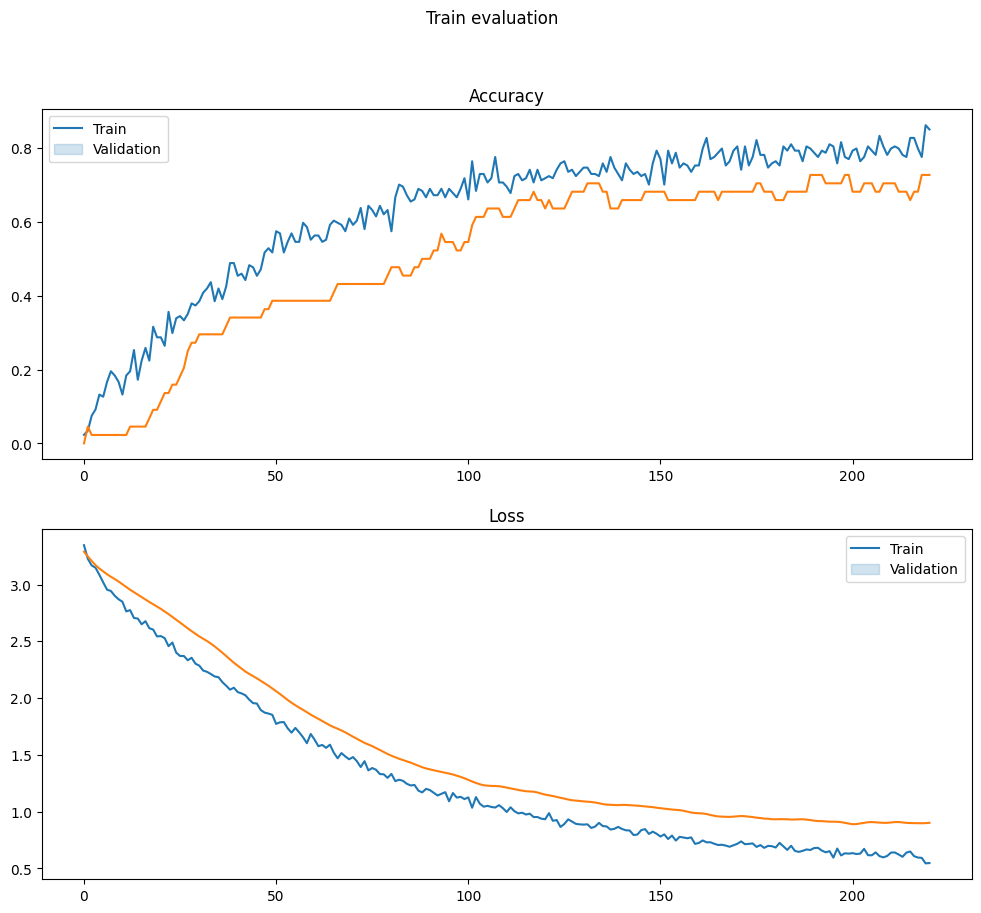

In [40]:
fig, ax=plt.subplots(2,1,figsize=(12,10))
fig.suptitle('Train evaluation')
# xlabel("X axis label")
# ylabel("Y axis label")

sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['accuracy'])
sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['val_accuracy'])

ax[0].legend(['Train','Validation'])
ax[0].set_title('Accuracy')

sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['loss'])
sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['val_loss'])

ax[1].legend(['Train','Validation'])
ax[1].set_title('Loss')
# creating charts and plotting them

In [41]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [42]:
model_save_path = 'keypoint_classifier/FF_model_right_11.hdf5'
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from keras.layers import GRU
model = Sequential()
model.add(Dense(256, input_shape=(42,), activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(NUM_CLASSES, activation="softmax"))

model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

# model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# callback for early abort
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

 # model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               11008     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 25)                3225      
                                                                 
Total params: 47,129
Trainable params: 47,129
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(
    X_train,
    y_train,
    epochs=500,
    batch_size=128,
    validation_split=0.2,
    callbacks=[cp_callback, es_callback]
)

Epoch 1/500
1/2 [==============>...............] - ETA: 0s - loss: 3.2168 - accuracy: 0.0547
Epoch 1: saving model to keypoint_classifier\FF_model_right_11.hdf5
2/2 [==============================] - 0s 119ms/step - loss: 3.2091 - accuracy: 0.0805 - val_loss: 3.1917 - val_accuracy: 0.1136
Epoch 2/500
1/2 [==============>...............] - ETA: 0s - loss: 3.1335 - accuracy: 0.2109
Epoch 2: saving model to keypoint_classifier\FF_model_right_11.hdf5
2/2 [==============================] - 0s 35ms/step - loss: 3.1218 - accuracy: 0.2126 - val_loss: 3.1461 - val_accuracy: 0.1136
Epoch 3/500
1/2 [==============>...............] - ETA: 0s - loss: 3.0788 - accuracy: 0.1797
Epoch 3: saving model to keypoint_classifier\FF_model_right_11.hdf5
2/2 [==============================] - 0s 34ms/step - loss: 3.0524 - accuracy: 0.2011 - val_loss: 3.1054 - val_accuracy: 0.1136
Epoch 4/500
1/2 [==============>...............] - ETA: 0s - loss: 2.9987 - accuracy: 0.2422
Epoch 4: saving model to keypoint_class

3/3 [==============================] - 0s 2ms/step


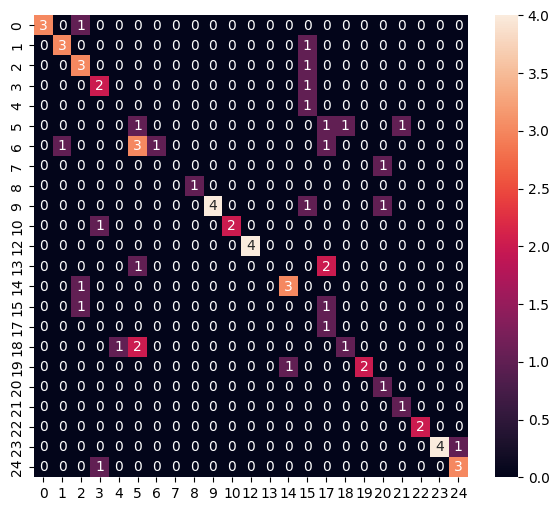

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.75      0.75      0.75         4
           2       0.50      0.75      0.60         4
           3       0.50      0.67      0.57         3
           4       0.00      0.00      0.00         1
           5       0.14      0.25      0.18         4
           6       1.00      0.17      0.29         6
           7       0.00      0.00      0.00         3
           8       1.00      1.00      1.00         1
           9       1.00      0.67      0.80         6
          10       1.00      0.67      0.80         3
          12       1.00      1.00      1.00         4
          13       0.00      0.00      0.00         3
          14       0.75      0.75      0.75         4
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         0
          17       0.17      1.00      0.29         1
     

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [45]:
from sklearn import metrics
flat = y_test.flatten()
flat2 = y_pred.flatten()

# indexes are classifiers
classification = metrics.classification_report(flat, flat2,digits=3)
print(classification)

              precision    recall  f1-score   support

           0      1.000     0.750     0.857         4
           1      0.750     0.750     0.750         4
           2      0.500     0.750     0.600         4
           3      0.500     0.667     0.571         3
           4      0.000     0.000     0.000         1
           5      0.143     0.250     0.182         4
           6      1.000     0.167     0.286         6
           7      0.000     0.000     0.000         3
           8      1.000     1.000     1.000         1
           9      1.000     0.667     0.800         6
          10      1.000     0.667     0.800         3
          12      1.000     1.000     1.000         4
          13      0.000     0.000     0.000         3
          14      0.750     0.750     0.750         4
          15      0.000     0.000     0.000         2
          16      0.000     0.000     0.000         0
          17      0.167     1.000     0.286         1
          18      0.500    

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

Text(0.5, 1.0, 'Loss')

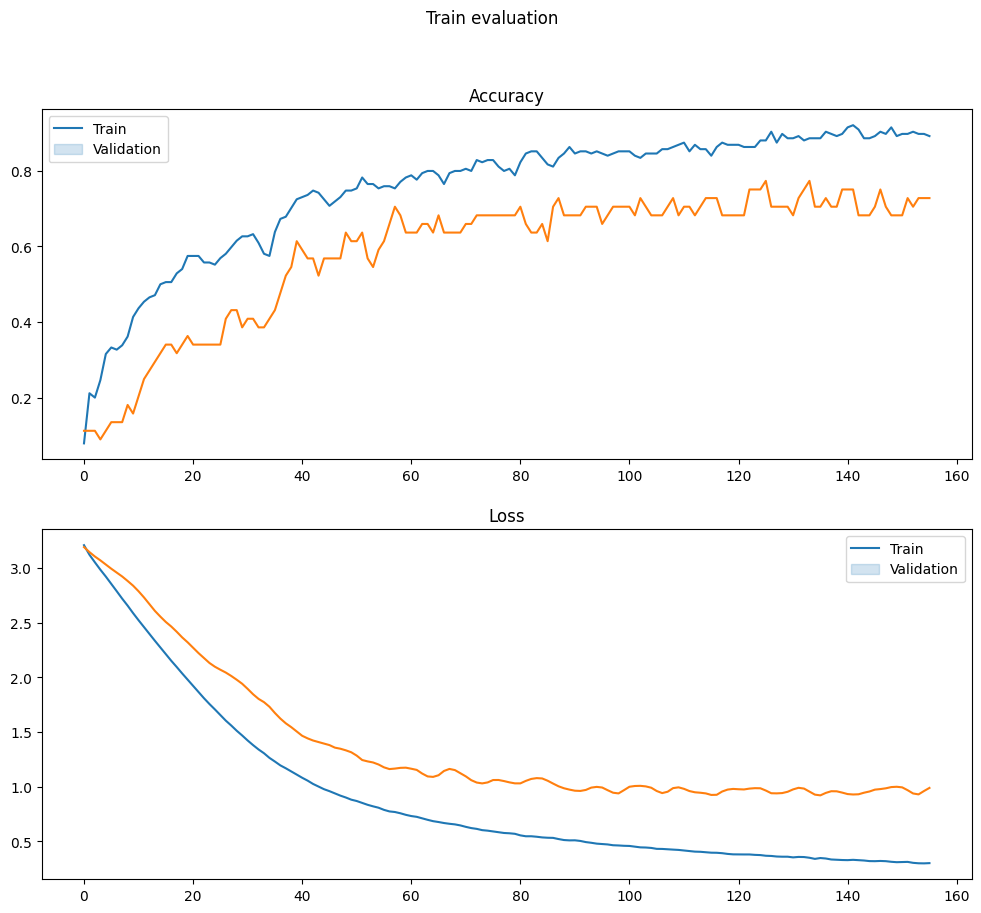

In [46]:
fig, ax=plt.subplots(2,1,figsize=(12,10))
fig.suptitle('Train evaluation')
# xlabel("X axis label")
# ylabel("Y axis label")

sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['accuracy'])
sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['val_accuracy'])

ax[0].legend(['Train','Validation'])
ax[0].set_title('Accuracy')

sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['loss'])
sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['val_loss'])

ax[1].legend(['Train','Validation'])
ax[1].set_title('Loss')
# creating charts and plotting them